# Random Number Generator using Rule30 Cellular Automata
### By Karan Shah

In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
def show_grid (grid):
    plt.matshow (grid)

The following functions simulate rule 30. Good for generating single random numbers and seeing cellular automata plots. For the actual generator that can be used multiple times, look at the class below these functions.

In [10]:
def genSeed():
    t = time.time()
    #print(t)
    t=int((t-int(t))*10**6)
    #print(t)
    s = str(bin(t))
    s = s[2:]
    #print(s)
    c = np.zeros(33)
    n = 16 - int(len(s)/2)
    for i in range(len(s)):
        c[n+i] = int(s[i])
    #print("Seed is:")
    return c

for i in range(20):
    genSeed()

16196

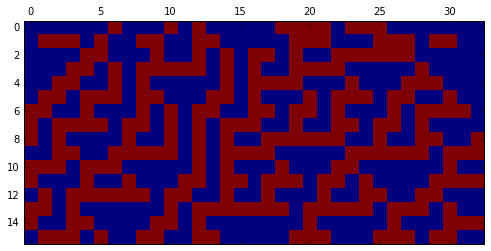

In [11]:
def rand30(seed = 0):
    if(seed == 0):
        seed = genSeed()
    
    rule30 = [0,1,1,1,1,0,0,0]
    ca = seed
    #print(type(seed[0]))
    ca_next = np.zeros(33)
    ca_whole = np.zeros((16,33))
    ca_whole[0,:]=ca 
    randnum = np.zeros(16)
    randnum[0] = ca[16]
    #print(ca)
    for i in range(1,16):
        ca_next = np.zeros(33)
        
        n = int(ca[32]*4+ca[0]*2+ca[1]*1)
        ca_next[0] = rule30[n]
        for j in range(1,32):
            #print("###")
            #print(j)
            n = ca[j-1]*4+ca[j]*2+ca[j+1]*1
            n = int(n)
            #print(n)
            ca_next[j] = rule30[n]
        n = int(ca[31]*4+ca[32]*2+ca[0]*1)
        ca_next[32] = rule30[n]
        randnum[i]= ca_next[16]
        ca_whole[i,:] = ca_next
        ca = ca_next
    
    #print(ca_next)
    
    ca_whole[1,:]=ca_next
    show_grid(ca_whole)
    #print(randnum)
    rstr = ''.join(str(e) for e in randnum.astype(int))
    return(int(rstr,2))
    
        
        

rand30()
    

## Use this class in your program

Use this in your program. Make an object of type randGen30(seed) and use the nextRand() function to generate new random numbers. Right now you have to normalize numbers yourself. 
Note: If you make an object without an argument, it will use current time as a seed.

In [12]:
class randGen30:
    rule30 = [0,1,1,1,1,0,0,0]
    
    def __init__(self,seed=0):
        self.seed = seed
        self.i = 0
        if(self.seed == 0):
            t = time.time()
            t = int((t-int(t))*10**6)
            s = str(bin(t))

        else:
            s = str(bin(int(self.seed)))
            if(len(s) > 33):
                s = s[0:33]
        
        s = s[2:]
        self.state = np.zeros(33)
        n = 16 - int(len(s)/2)
        for i in range(len(s)):
            self.state[n+i] = int(s[i])
        
    def nextRand(self):
        
        ca = self.state
        ca_next = np.zeros(33)
        
        randnum = np.zeros(16)
        randnum[0] = ca[16]

        for i in range(1,16):
            ca_next = np.zeros(33)
            n = int(ca[32]*4+ca[0]*2+ca[1]*1)
            ca_next[0] = randGen30.rule30[n]
            for j in range(1,32):
                n = ca[j-1]*4+ca[j]*2+ca[j+1]*1
                n = int(n)
                ca_next[j] = randGen30.rule30[n]
            n = int(ca[31]*4+ca[32]*2+ca[0]*1)
            ca_next[32] = randGen30.rule30[n]
            randnum[i]= ca_next[16]
            ca = ca_next
            
        self.state = ca
        rstr = ''.join(str(e) for e in randnum.astype(int))
        return(int(rstr,2))

In [13]:
#Default seed test

r = randGen30()
p = randGen30()
print("Random numbers from obj r")
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())

print("Random numbers from obj p")
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())


Random numbers from obj r
40619
57030
17811
58408
Random numbers from obj p
40459
56927
43085
47619


In [14]:
#User provided seed test

r = randGen30(314159)
p = randGen30(314159)
print("Random numbers from obj r")
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())

print("Random numbers from obj p")
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())


Random numbers from obj r
62715
38734
6270
6515
Random numbers from obj p
62715
38734
6270
6515
